In [366]:
# Pandas ve NumPy
import pandas as pd
import numpy as np

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import geopandas as gpd
from shapely.geometry import Point

In [367]:
# Veri seti notebook içerisine dahil edildi.
df_ = pd.read_csv(filepath_or_buffer="/kaggle/input/us-crime-dataset/US_Crime_DataSet.csv", low_memory = False)
df = df_.copy()

### Neden `low_memory=False` Kullandım?

#### **Problem:**
Veri setini Pandas ile yüklerken şu uyarı mesajını aldım:
**DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False**

Bu problemi çözmek için **`low_memory=False`** parametresini kullandım. Bu pandasın veri setini parça parça olarak değil **bütün** olarak okumasını sağlar. Böylece sütunların tamamı analiz edilebilir ve veri türleri doğru belirlenebilir.  


In [368]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

In [369]:
# Veri setinin ilk 6 satırını gösterir.
df.head(6)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1.0,NaN,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,January,1.0,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0.0,0.0,FBI
1,2.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,March,1.0,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,NaN,0.0,0.0,FBI
2,3.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,March,2.0,Murder or Manslaughter,...,NaN,Unknown,0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,FBI
3,4.0,AK00101,Anchorage,NaN,Anchorage,Alaska,1980.0,April,1.0,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0.0,0.0,FBI
4,5.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,April,2.0,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0.0,1.0,FBI
5,6.0,AK00101,Anchorage,Municipal Police,NaN,Alaska,1980.0,May,1.0,Murder or Manslaughter,...,Unknown,Male,36,White,Unknown,Acquaintance,Rifle,0.0,0.0,FBI


In [370]:
# Veri setinin son 6 satırını gösterir.
df.tail(4)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
638450,638451.0,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014.0,June,1.0,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0.0,0.0,FBI
638451,638452.0,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014.0,September,1.0,Murder or Manslaughter,...,Unknown,Female,22,NaN,Unknown,Daughter,Suffocation,0.0,0.0,FBI
638452,638453.0,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014.0,December,1.0,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0.0,1.0,FBI
638453,638454.0,NaN,Rock Springs,Municipal Police,Sweetwater,Wyoming,2014.0,September,1.0,Murder or Manslaughter,...,Not Hispanic,Female,24,White,Not Hispanic,Daughter,Blunt Object,0.0,1.0,FBI


`info()` metodu, veri setinin genel yapısını anlamak ve eksik veri, veri türleri gibi önemli bilgileri hızlıca elde etmek için kullanılır. 

In [371]:
# Sütun bilgilerine erişim
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Record ID              619576 non-null  float64
 1   Agency Code            619667 non-null  object 
 2   Agency Name            619644 non-null  object 
 3   Agency Type            619520 non-null  object 
 4   City                   619592 non-null  object 
 5   State                  619486 non-null  object 
 6   Year                   619444 non-null  float64
 7   Month                  619599 non-null  object 
 8   Incident               619585 non-null  float64
 9   Crime Type             619412 non-null  object 
 10  Crime Solved           619879 non-null  object 
 11  Victim Sex             619601 non-null  object 
 12  Victim Age             619614 non-null  float64
 13  Victim Race            619497 non-null  object 
 14  Victim Ethnicity       619550 non-nu

Veri setimdeki tüm sayısal sütunların genel durumunu göstermek için `df.describe()`:

In [372]:
df.describe()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,619576.000000,619444.000000,619585.000000,619614.000000,619615.000000,619446.000000
mean,319239.675598,1995.801009,22.975542,35.025358,0.123333,0.184918
std,184330.215828,9.927800,92.124999,41.585687,0.537893,0.584908
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,159611.750000,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,319251.500000,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,478889.250000,2004.000000,10.000000,42.000000,0.000000,0.000000
max,638454.000000,2014.000000,999.000000,998.000000,10.000000,10.000000


### Neden `df.describe()` Kullanıyorum?
**df.describe()** fonksiyonunu, veri setimin genel istatistiksel özelliklerini hızlıca anlamak ve analiz sürecine hazırlanmak için kullanıyorum.  Bu fonksiyon, sayısal sütunlara ait özet istatistikleri döndürerek, veri setimdeki değerlerin dağılımını ve olası sorunları tespit etmemi sağlıyor.

In [373]:
# Veri setimdeki satır ve sütun sayılarını görmek için
df.shape # -> (satır, sütun)

(638454, 24)

In [374]:
# veri setimdeki sütun adlarını görmek için 
df.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

In [375]:
# Veri setimdeki değişkenleri ve tiplerini görüntülemek için
df.dtypes

Record ID                float64
Agency Code               object
Agency Name               object
Agency Type               object
City                      object
State                     object
Year                     float64
Month                     object
Incident                 float64
Crime Type                object
Crime Solved              object
Victim Sex                object
Victim Age               float64
Victim Race               object
Victim Ethnicity          object
Perpetrator Sex           object
Perpetrator Age           object
Perpetrator Race          object
Perpetrator Ethnicity     object
Relationship              object
Weapon                    object
Victim Count             float64
Perpetrator Count        float64
Record Source             object
dtype: object

In [376]:
# Sütun isimleri ve türleri görüntülemek için
for col in df.columns:
    print(f"Sütun: {col}, Tür: {df[col].dtype}")

Sütun: Record ID, Tür: float64
Sütun: Agency Code, Tür: object
Sütun: Agency Name, Tür: object
Sütun: Agency Type, Tür: object
Sütun: City, Tür: object
Sütun: State, Tür: object
Sütun: Year, Tür: float64
Sütun: Month, Tür: object
Sütun: Incident, Tür: float64
Sütun: Crime Type, Tür: object
Sütun: Crime Solved, Tür: object
Sütun: Victim Sex, Tür: object
Sütun: Victim Age, Tür: float64
Sütun: Victim Race, Tür: object
Sütun: Victim Ethnicity, Tür: object
Sütun: Perpetrator Sex, Tür: object
Sütun: Perpetrator Age, Tür: object
Sütun: Perpetrator Race, Tür: object
Sütun: Perpetrator Ethnicity, Tür: object
Sütun: Relationship, Tür: object
Sütun: Weapon, Tür: object
Sütun: Victim Count, Tür: float64
Sütun: Perpetrator Count, Tür: float64
Sütun: Record Source, Tür: object


### Neden Verileri Kategorik ve Sayısal Olarak Ayırıyoruz?
Veri setindeki sütunları kategorik ve sayısal olarak ayırmak, her sütunun analiz için doğru tekniklerle ele alınmasını sağlamak ve daha anlamlı sonuçlar elde etmek için gereklidir.
Sayısal veya kategorik sütunları filtrelemek, belirli türdeki kolonları seçmek için:

In [377]:
categorical_features = []
numerical_features = []

for col in df.columns:
    # Kategorik sütunlar
    if df[col].dtype == "object":  
        categorical_features.append(col)
    # Sayısal sütunlar
    else:  
        numerical_features.append(col)

print("Kategorik Sütunlar:", categorical_features)
print("Sayısal Sütunlar:", numerical_features)

Kategorik Sütunlar: ['Agency Code', 'Agency Name', 'Agency Type', 'City', 'State', 'Month', 'Crime Type', 'Crime Solved', 'Victim Sex', 'Victim Race', 'Victim Ethnicity', 'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race', 'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Record Source']
Sayısal Sütunlar: ['Record ID', 'Year', 'Incident', 'Victim Age', 'Victim Count', 'Perpetrator Count']


### List comprehension 
Python'da liste oluşturmanın daha kısa ve etkili bir yoludur. Döngüler ve koşullarla bir listeyi tek bir satırda oluşturmamıza olanak tanır. Bu, kodun okunabilirliğini artırır ve yazımı kolaylaştırır. Yukarıdaki kodu list comprehension ile yazmak istersek: 

In [378]:
# Kategorik sütunları belirleme
categorical_features = [col for col in df.columns if df[col].dtype == "object"]

# Sayısal sütunları belirleme
numerical_features = [col for col in df.columns if df[col].dtype in ["int64","float64"]]

# Sonuçları yazdırma
print("Kategorik Sütunlar:", categorical_features)
print("Sayısal Sütunlar:", numerical_features)

Kategorik Sütunlar: ['Agency Code', 'Agency Name', 'Agency Type', 'City', 'State', 'Month', 'Crime Type', 'Crime Solved', 'Victim Sex', 'Victim Race', 'Victim Ethnicity', 'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race', 'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Record Source']
Sayısal Sütunlar: ['Record ID', 'Year', 'Incident', 'Victim Age', 'Victim Count', 'Perpetrator Count']


In [379]:
for col in df.columns:
    # Eğer sütun 'categorical_features' listesinde ise
    if col in categorical_features:
         # Sütunun veri türünü 'Categorical' olarak değiştir
        df[col] = pd.Categorical(df[col])

# Veri türü dönüşümünün başarılı olup olmadığını kontrol etmek için
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Record ID              619576 non-null  float64 
 1   Agency Code            619667 non-null  category
 2   Agency Name            619644 non-null  category
 3   Agency Type            619520 non-null  category
 4   City                   619592 non-null  category
 5   State                  619486 non-null  category
 6   Year                   619444 non-null  float64 
 7   Month                  619599 non-null  category
 8   Incident               619585 non-null  float64 
 9   Crime Type             619412 non-null  category
 10  Crime Solved           619879 non-null  category
 11  Victim Sex             619601 non-null  category
 12  Victim Age             619614 non-null  float64 
 13  Victim Race            619497 non-null  category
 14  Victim Ethnicity    

Bu kod, yalnızca **categorical_features** listesinde yer alan sütunlara işlem uygular ve bu sütunları **Categorical** veri türüne dönüştürür.

In [380]:
# Belirli bir sütunun veri tipini konrol etmek
column_name = 'Year'
print(f"{column_name} sütununun türü: {df[column_name].dtype}")

Year sütununun türü: float64


In [381]:
for col in df.columns: # DataFramedeki her sütunu dolaşır
    try:
         # Sütunun veri türünü ve ilk değerini yazdırır
        print(f"{col}: {df[col].dtype}, İlk Değer: {df[col].iloc[0]}")
    except Exception as e:
        # Eğer bir hata oluşursa sütunun adını ve hata mesajını yazdırır
        print(f"{col}: Hata: {e}")

Record ID: float64, İlk Değer: 1.0
Agency Code: category, İlk Değer: nan
Agency Name: category, İlk Değer: Anchorage
Agency Type: category, İlk Değer: Municipal Police
City: category, İlk Değer: Anchorage
State: category, İlk Değer: Alaska
Year: float64, İlk Değer: 1980.0
Month: category, İlk Değer: January
Incident: float64, İlk Değer: 1.0
Crime Type: category, İlk Değer: Murder or Manslaughter
Crime Solved: category, İlk Değer: Yes
Victim Sex: category, İlk Değer: Male
Victim Age: float64, İlk Değer: 14.0
Victim Race: category, İlk Değer: Native American/Alaska Native
Victim Ethnicity: category, İlk Değer: Unknown
Perpetrator Sex: category, İlk Değer: Male
Perpetrator Age: category, İlk Değer: 15
Perpetrator Race: category, İlk Değer: Native American/Alaska Native
Perpetrator Ethnicity: category, İlk Değer: Unknown
Relationship: category, İlk Değer: Acquaintance
Weapon: category, İlk Değer: Blunt Object
Victim Count: float64, İlk Değer: 0.0
Perpetrator Count: float64, İlk Değer: 0.0


### Veri Türlerini ve İlk Değerleri Kontrol Etme
Yukarıdaki kod veri setimdeki her bir sütunun veri türünü ve sütundaki ilk değeri kontrol etmek için ve herhangi bir hata durumunda bu hatayı da raporlarlamak için kullanılır. Bu, veri setinin yapısını anlamak ve olası sorunları tespit etmek için faydalı bir adımdır.

In [382]:
# İlk 5 satırın 'Victim Sex' sütununu almak için
df['Victim Sex'][:5]

0      Male
1      Male
2    Female
3      Male
4    Female
Name: Victim Sex, dtype: category
Categories (3, object): ['Female', 'Male', 'Unknown']

In [383]:
# DataFrame içindeki sayısal sütunlar hakkında özet istatistik bilgileri sağlar.
df.describe()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,619576.000000,619444.000000,619585.000000,619614.000000,619615.000000,619446.000000
mean,319239.675598,1995.801009,22.975542,35.025358,0.123333,0.184918
std,184330.215828,9.927800,92.124999,41.585687,0.537893,0.584908
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,159611.750000,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,319251.500000,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,478889.250000,2004.000000,10.000000,42.000000,0.000000,0.000000
max,638454.000000,2014.000000,999.000000,998.000000,10.000000,10.000000


*df.describe()* fonksiyonu varsayılan olarak sayısal sütunlar için aşağıdaki bilgileri döndürür:

**`count` (Veri Sayısı):** Her sütunda eksik olmayan veri sayısını verir.

**`mean` (Ortalama):** Sütundaki tüm değerlerin aritmetik ortalamasını hesaplar.

**`std` (Standart Sapma):** Sütundaki değerlerin yayılımını ölçer.

**`min` (Minimum Değer):** Sütundaki en küçük değeri döndürür.

**`25%` (1. Çeyrek Değer - Q1):** Sütundaki değerlerin ilk %25'lik dilimini belirtir.

**`50%` (Medyan - Q2):** Ortanca değeri döndürür.

**`75%` (3. Çeyrek Değer - Q3):** Sütundaki değerlerin %75'lik dilimini belirtir.

**`max` (Maksimum Değer):** Sütundaki en büyük değeri döndürür.

In [384]:
# DataFrame'deki kategorik veri türündeki sütunlar category hakkında özet istatistikler sağlar.
df.describe(include='category')

,Agency Code,Agency Name,Agency Type,City,State,Month,Crime Type,Crime Solved,Victim Sex,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Record Source
count,619667,619644,619520,619592,619486,619599,619412,619879,619601,619497,619550,619754,619592,619533,619649,619529,619650,619563
unique,11958,9176,7,1779,51,12,2,2,3,5,3,3,101,5,3,28,16,2
top,NY03030,New York,Municipal Police,Los Angeles,California,July,Murder or Manslaughter,Yes,Male,White,Unknown,Male,0,White,Unknown,Unknown,Handgun,FBI
freq,37316,37306,478389,43164,96727,56938,610564,434978,479583,308072,357406,387918,209944,211700,433259,264873,308158,598388


Bu kod, sadece **category** türündeki sütunları analiz ederek şu özet istatistikleri döndürür:

**`count`:** Kategorik sütunda kaç geçerli (eksik olmayan) değer olduğunu gösterir.
     
**`unique`:** Kategorik sütundaki benzersiz (unique) değerlerin sayısını belirtir.

**`top`:** En sık görülen değeri döndürür (mod).

**`freq`:** En sık görülen değerin tekrar sayısını belirtir.

In [385]:
# Hem sayısal hem de kategorik sütunlar için özet istatistikler
df.describe(include = "all")

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
count,619576.000000,619667,619644,619520,619592,619486,619444.000000,619599,619585.000000,619412,...,619550,619754,619592,619533,619649,619529,619650,619615.000000,619446.000000,619563
unique,NaN,11958,9176,7,1779,51,NaN,12,NaN,2,...,3,3,101,5,3,28,16,NaN,NaN,2
top,NaN,NY03030,New York,Municipal Police,Los Angeles,California,NaN,July,NaN,Murder or Manslaughter,...,Unknown,Male,0,White,Unknown,Unknown,Handgun,NaN,NaN,FBI
freq,NaN,37316,37306,478389,43164,96727,NaN,56938,NaN,610564,...,357406,387918,209944,211700,433259,264873,308158,NaN,NaN,598388
mean,319239.675598,NaN,NaN,NaN,NaN,NaN,1995.801009,NaN,22.975542,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.123333,0.184918,NaN
std,184330.215828,NaN,NaN,NaN,NaN,NaN,9.927800,NaN,92.124999,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.537893,0.584908,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,1980.000000,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,159611.750000,NaN,NaN,NaN,NaN,NaN,1987.000000,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
50%,319251.500000,NaN,NaN,NaN,NaN,NaN,1995.000000,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
75%,478889.250000,NaN,NaN,NaN,NaN,NaN,2004.000000,NaN,10.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN


In [386]:
# .T pandasta transpoze işlemi anlamına gelir.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Record ID,619576.0,319239.675598,184330.215828,1.0,159611.75,319251.5,478889.25,638454.0
Year,619444.0,1995.801009,9.927800,1980.0,1987.00,1995.0,2004.00,2014.0
Incident,619585.0,22.975542,92.124999,0.0,1.00,2.0,10.00,999.0
Victim Age,619614.0,35.025358,41.585687,0.0,22.00,30.0,42.00,998.0
Victim Count,619615.0,0.123333,0.537893,0.0,0.00,0.0,0.00,10.0
Perpetrator Count,619446.0,0.184918,0.584908,0.0,0.00,0.0,0.00,10.0


Yukarıdaki komut, DataFrame'in **sayısal sütunları** için oluşturulan özet istatistik tablosunu **transpoze** ederek (satırları ve sütunları yer değiştirerek) daha okunabilir bir formata getirir. Veriyi daha kolay analiz edebilmeyi sağlar.

**Eksik Veri Gözlemleme**

In [387]:
df.isna().sum()

Record ID                18878
Agency Code              18787
Agency Name              18810
Agency Type              18934
City                     18862
State                    18968
Year                     19010
Month                    18855
Incident                 18869
Crime Type               19042
Crime Solved             18575
Victim Sex               18853
Victim Age               18840
Victim Race              18957
Victim Ethnicity         18904
Perpetrator Sex          18700
Perpetrator Age          18862
Perpetrator Race         18921
Perpetrator Ethnicity    18805
Relationship             18925
Weapon                   18804
Victim Count             18839
Perpetrator Count        19008
Record Source            18891
dtype: int64

In [388]:
# Veri setindeki toplam eksik değer sayısı
df.isna().sum().sum()

452899

In [389]:
# Eksik olmayan değerlerin sayısı
df.notnull().sum()

Record ID                619576
Agency Code              619667
Agency Name              619644
Agency Type              619520
City                     619592
State                    619486
Year                     619444
Month                    619599
Incident                 619585
Crime Type               619412
Crime Solved             619879
Victim Sex               619601
Victim Age               619614
Victim Race              619497
Victim Ethnicity         619550
Perpetrator Sex          619754
Perpetrator Age          619592
Perpetrator Race         619533
Perpetrator Ethnicity    619649
Relationship             619529
Weapon                   619650
Victim Count             619615
Perpetrator Count        619446
Record Source            619563
dtype: int64

In [390]:
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 14869997 adet eksik olmayan, 452899 eksik gözlem var.


In [391]:
#  Veri setinde en az bir gözlemi eksik olan kayıtlara ulaşmak
df[df.isnull().any(axis = 1)]

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1.0,NaN,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,January,1.0,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0.0,0.0,FBI
1,2.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,March,1.0,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,NaN,0.0,0.0,FBI
2,3.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,March,2.0,Murder or Manslaughter,...,NaN,Unknown,0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,FBI
3,4.0,AK00101,Anchorage,NaN,Anchorage,Alaska,1980.0,April,1.0,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0.0,0.0,FBI
5,6.0,AK00101,Anchorage,Municipal Police,NaN,Alaska,1980.0,May,1.0,Murder or Manslaughter,...,Unknown,Male,36,White,Unknown,Acquaintance,Rifle,0.0,0.0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638447,638448.0,WY01301,Casper,Municipal Police,Natrona,Wyoming,2014.0,June,1.0,Murder or Manslaughter,...,Not Hispanic,Male,22,White,Unknown,Girlfriend,Handgun,0.0,0.0,FBI
638448,638449.0,WY01301,Casper,Municipal Police,Natrona,Wyoming,2014.0,NaN,1.0,Murder or Manslaughter,...,Unknown,Male,67,Black,Unknown,Friend,Firearm,NaN,0.0,FBI
638449,NaN,WY01500,Park County,Sheriff,Park,Wyoming,2014.0,January,1.0,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0.0,0.0,FBI
638451,638452.0,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014.0,September,1.0,Murder or Manslaughter,...,Unknown,Female,22,NaN,Unknown,Daughter,Suffocation,0.0,0.0,FBI


In [392]:
# Hiç eksik gözlemi bulunmayan ilk 5 kayıt
df[df.notnull().all(axis = 1)][:5]

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
4,5.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,April,2.0,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0.0,1.0,FBI
8,9.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,June,2.0,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0.0,0.0,FBI
13,14.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,August,1.0,Murder or Manslaughter,...,Unknown,Male,49,White,Unknown,Unknown,Fall,0.0,0.0,FBI
14,15.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,August,2.0,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0.0,0.0,FBI
17,18.0,AK00103,Juneau,Municipal Police,Juneau,Alaska,1980.0,November,1.0,Murder or Manslaughter,...,Unknown,Male,23,Native American/Alaska Native,Unknown,Brother,Blunt Object,0.0,1.0,FBI


In [393]:
# Eksik veri içeren sütunların sayısı
num_missing_columns = (df.isna().sum() > 0).sum()

# Veri setindeki toplam sütun sayısı
total_columns = len(df.columns)

num_missing_columns, total_columns # tüm sütunlarda eksik veri var

(24, 24)

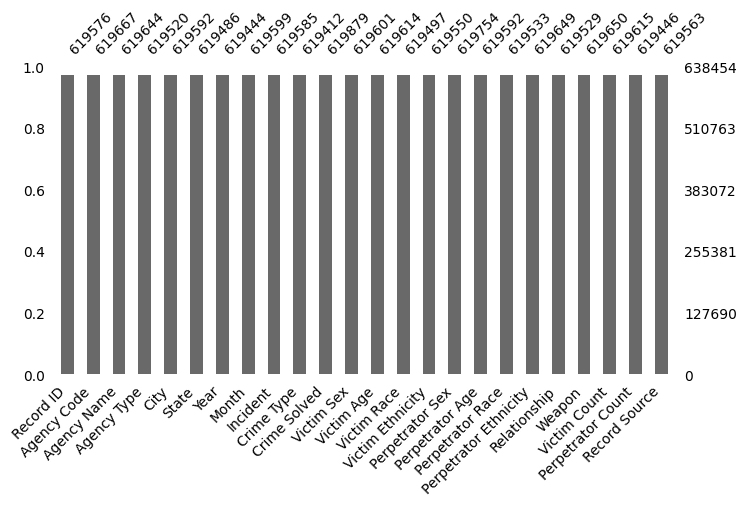

In [394]:
import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

Yukarıdaki grafik, sütunların tamamının neredeyse dolu olduğunu gösteriyor.Bu, eksik veri oranının oldukça düşük olduğu anlamına gelir.

In [395]:
# Her bir değişken için, o değişkendeki eksik değer sayısının toplam kayıt sayısının % kaçı olduğunu hesaplar.
missing_percentage = (df.isna().sum() / len(df)) * 100

missing_percentage

Record ID                2.956830
Agency Code              2.942577
Agency Name              2.946179
Agency Type              2.965601
City                     2.954324
State                    2.970927
Year                     2.977505
Month                    2.953228
Incident                 2.955420
Crime Type               2.982517
Crime Solved             2.909372
Victim Sex               2.952914
Victim Age               2.950878
Victim Race              2.969204
Victim Ethnicity         2.960902
Perpetrator Sex          2.928950
Perpetrator Age          2.954324
Perpetrator Race         2.963565
Perpetrator Ethnicity    2.945396
Relationship             2.964192
Weapon                   2.945240
Victim Count             2.950722
Perpetrator Count        2.977192
Record Source            2.958866
dtype: float64

In [396]:
# Veri setindeki tüm hücreleri kontrol eder ve eksik değerleri (NaN) tespit eder.
missing_data = pd.DataFrame({ # Hesaplanan eksik değer sayısı ve oranını bir dataframe tablo halinde gösterme
    "Eksik Değer Sayısı": df.isna().sum(),
    "Eksik Değer Oranı (%)": (df.isna().sum() / len(df)) * 100
})

missing_data 

,Eksik Değer Sayısı,Eksik Değer Oranı (%)
Record ID,18878,2.956830
Agency Code,18787,2.942577
Agency Name,18810,2.946179
Agency Type,18934,2.965601
City,18862,2.954324
State,18968,2.970927
Year,19010,2.977505
Month,18855,2.953228
Incident,18869,2.955420
Crime Type,19042,2.982517


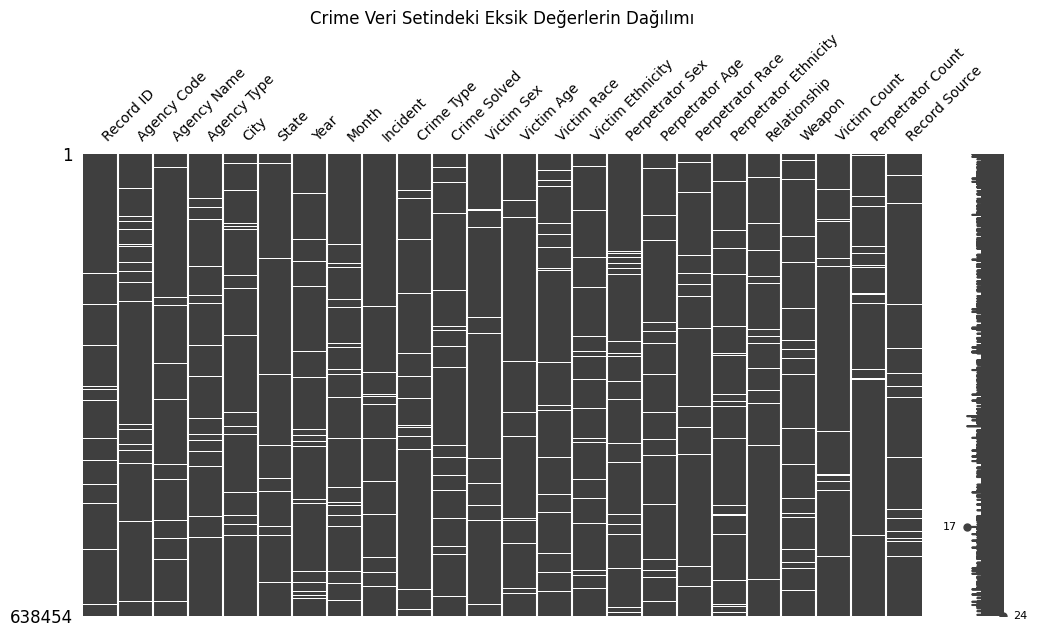

In [397]:
# Tüm veri setindeki eksik değerlerin görselleştirilmesi
msno.matrix(df = df, figsize = (12, 6), fontsize = 10)
plt.title("Crime Veri Setindeki Eksik Değerlerin Dağılımı")
plt.show()

Yukarıdaki grafiğe bakıldığında, eksik veriler farklı sütunlarda rastgele dağılmış görünüyor.Eksik verilerin belirli bir düzen içerisinde olduğunu gösteren bir şey yok. Tüm sütunlarda eksik veri var.Bazı sütunlarda eksik veri oranı daha yüksek (örneğin, "Victim Age" ve "Perpetrator Age").

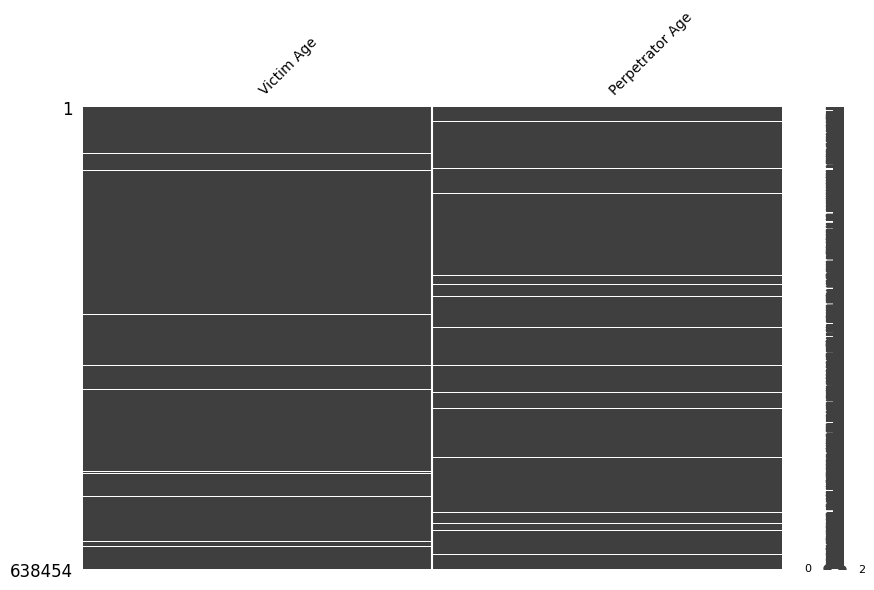

In [398]:
# Belirli sütunların eksik değerlerini incelemek
msno.matrix(df = df[['Victim Age', 'Perpetrator Age']],
            figsize = (10, 6),
            fontsize = 10);

Yukarıdaki grafikte, hem "Victim Age" hem de "Perpetrator Age" sütunlarında eksik veriler rastgele dağılmış görünüyor. Bazı satırlarda hem "Victim Age" hem de "Perpetrator Age" eksik, bu da eksik verilerin bu sütunlarda birbiriyle ilişkili olabileceğini gösterebilir."Perpetrator Age" sütununda eksik veri oranı, "Victim Age" sütununa göre daha fazla.

In [399]:
# İki sütunun eksik veri oranına erişim
missing_percentage = (df[['Victim Age', 'Perpetrator Age']].isna().sum() / len(df)) * 100
missing_percentage

Victim Age         2.950878
Perpetrator Age    2.954324
dtype: float64

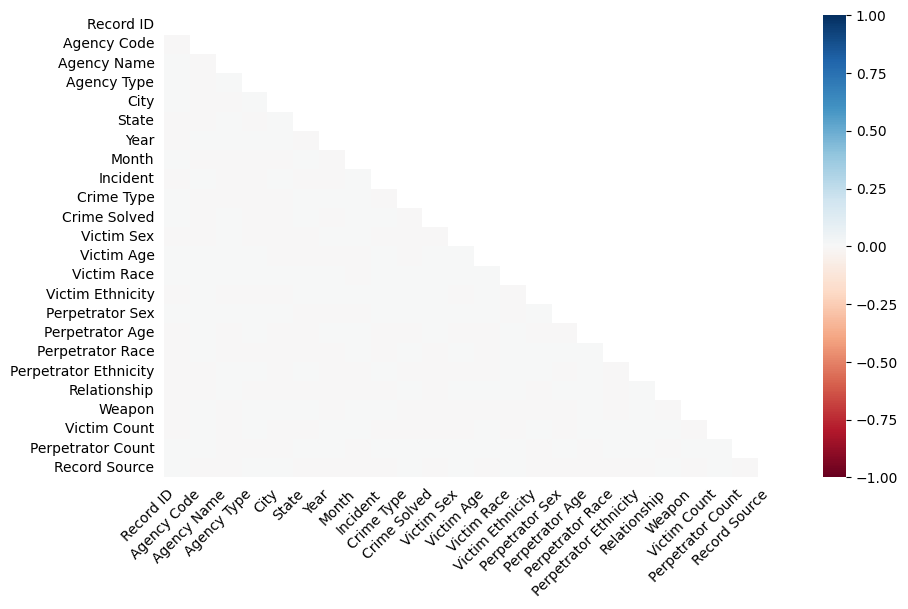

In [400]:
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

**Eksik veri korelasyon ısı haritası**
renk skalası:

**Mavi (1.00):** Eksik veriler tamamen ilişkilidir (aynı satırlarda eksik).

**Kırmızı (-1.00):** Ters ilişki, biri eksikse diğeri dolu.

**Beyaz (0.00):** Hiçbir ilişki yoktur, eksik veriler rastgele dağılmıştır.

-> Grafiğe göre çoğu eksik veri arasında çok düşük korelasyon görülüyor. Korelasyonların düşük olması, eksik verilerin birbirinden bağımsız olduğunu gösteriyor. Buna göre, eksik değerler büyük ölçüde rastgele.


In [401]:
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturuyorum.
df_fillna = df.copy()
df_fillna.head(5)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1.0,NaN,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,January,1.0,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0.0,0.0,FBI
1,2.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,March,1.0,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,NaN,0.0,0.0,FBI
2,3.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,March,2.0,Murder or Manslaughter,...,NaN,Unknown,0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,FBI
3,4.0,AK00101,Anchorage,NaN,Anchorage,Alaska,1980.0,April,1.0,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0.0,0.0,FBI
4,5.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,April,2.0,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0.0,1.0,FBI


In [402]:
df_fillna.isna().sum()

Record ID                18878
Agency Code              18787
Agency Name              18810
Agency Type              18934
City                     18862
State                    18968
Year                     19010
Month                    18855
Incident                 18869
Crime Type               19042
Crime Solved             18575
Victim Sex               18853
Victim Age               18840
Victim Race              18957
Victim Ethnicity         18904
Perpetrator Sex          18700
Perpetrator Age          18862
Perpetrator Race         18921
Perpetrator Ethnicity    18805
Relationship             18925
Weapon                   18804
Victim Count             18839
Perpetrator Count        19008
Record Source            18891
dtype: int64

**Sayısal Değişkenlerin Doldurulması**

In [403]:
# Çarpıklığı hesaplamak
skewness = df[numerical_features].skew()
print("Sütunların Çarpıklık Değerleri:")
print(skewness)

Sütunların Çarpıklık Değerleri:
Record ID            -0.000134
Year                  0.157970
Incident              7.357788
Victim Age           18.972846
Victim Count          8.159971
Perpetrator Count     4.659671
dtype: float64


Çarpıklık değerlerine bakarak, doldurma işlemini hangi sütunlar için ortalama (mean), hangi sütunlar için medyan (median) kullanmamız gerektiğini belirleyebiliriz. Genel kural şu şekildedir:

Simetrik veya hafif çarpık sütunlar (çarpıklık ~0): Ortalama (mean) kullanılır.

Aşırı çarpık sütunlar (çarpıklık > 1.0): Medyan (median) kullanılır.

Yukarıdaki sayısal değişkenlerin çarpıklığına bakıldığında:

**Record ID** : Neredeyse simetrik, çarpık değil. Mean kullanılabilir.

**Year** : Hafif çarpık, simetriye yakın. Mean kullanılabilir.

**Incident** : Aşırı pozitif çarpık. Median kullanılabilir.

**Victim Age** : Aşırı pozitif çarpık. Median kullanılabilir.

**Victim Count** : Aşırı pozitif çarpık. Median kullanılabilir.

**Perpetrator Count** : Çok pozitif çarpık. Median kullanılabilir.
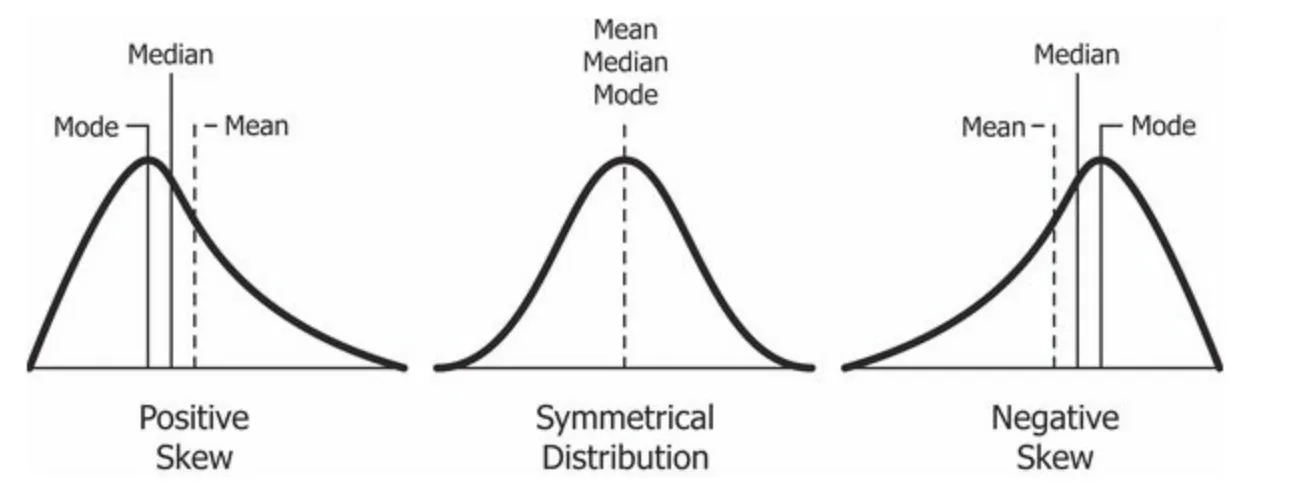
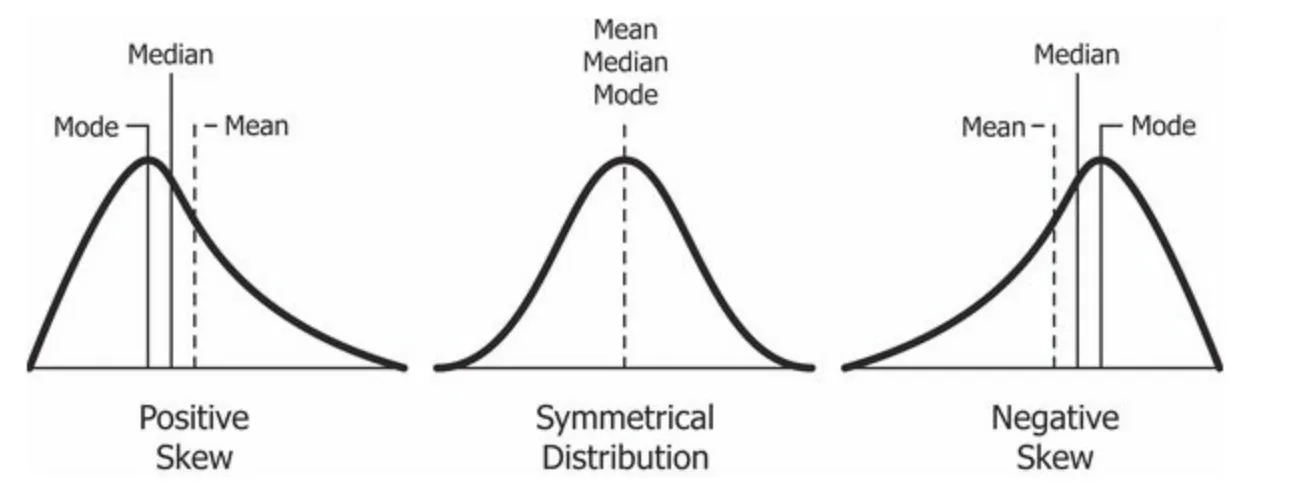

In [404]:
# Ortalama ile doldurulacak sütunlar
mean_columns = ['Record ID', 'Year']

for col in mean_columns:
    df[col] = df[col].fillna(df[col].mean())

# Medyan ile doldurulacak sütunlar
median_columns = ['Incident', 'Victim Age', 'Victim Count', 'Perpetrator Count']

for col in median_columns:
    df[col] = df[col].fillna(df[col].median())

In [405]:
df.isna().sum()

Record ID                    0
Agency Code              18787
Agency Name              18810
Agency Type              18934
City                     18862
State                    18968
Year                         0
Month                    18855
Incident                     0
Crime Type               19042
Crime Solved             18575
Victim Sex               18853
Victim Age                   0
Victim Race              18957
Victim Ethnicity         18904
Perpetrator Sex          18700
Perpetrator Age          18862
Perpetrator Race         18921
Perpetrator Ethnicity    18805
Relationship             18925
Weapon                   18804
Victim Count                 0
Perpetrator Count            0
Record Source            18891
dtype: int64

**Kategorik Değişkenlerin Doldurulması**

In [406]:
# Kategorik sütunları belirleme
categorical_columns = df.select_dtypes(include=['category']).columns

# Eksik değerleri her sütunun modu ile doldurma
for col in categorical_columns:
    mode_value = df[col].mode()[0]  # Mod değerini hesapla
    df[col] = df[col].fillna(mode_value)  # Eksik değerleri mod ile doldur ve sonucu sütuna ata

In [407]:
df.isna().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

Kategorik değişkenlerin eksik verileir mod ile doldurulmuştur. Mod yöntemi, veri setindeki en sık görülen değeri kullanarak doğal dağılımı korur. Eksik veri oranının %5'in altında olması, bu yöntemin güvenilir bir şekilde kullanılmasını sağlamıştır.Aynı zamanda, hızlı bir çözümdür.

In [408]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True))

Agency Code
NY03030    0.087873
CA01942    0.035929
ILCPD00    0.032413
MI82349    0.026154
TXHPD00    0.019607
             ...   
IN05201    0.000002
PA01532    0.000002
PA01539    0.000002
PA01544    0.000002
PA01601    0.000002
Name: proportion, Length: 11958, dtype: float64
Agency Name
New York                     0.087894
Los Angeles                  0.044102
Chicago                      0.032364
Detroit                      0.026213
Houston                      0.019768
                               ...   
Lower Alloways Creek Tow     0.000002
Lower Chichester Township    0.000002
Lower Windsor Township       0.000002
Lower Yoder Township         0.000002
Morrow County                0.000002
Name: proportion, Length: 9176, dtype: float64
Agency Type
Municipal Police    0.778949
Sheriff             0.160120
County Police       0.034461
State Police        0.021638
Special Police      0.004389
Regional Police     0.000362
Tribal Police       0.000081
Name: proportion, dtype: flo

Bu kod bloğu, veri setindeki her bir kategorik özellik için değerlerin yüzdelik oranını hesaplar ve sonuçları ekrana yazdırır.**value_counts(normalize=True)** fonksiyonu, her bir kategorik değerin toplam içindeki oranını, yani normalleştirilmiş frekansını hesaplamak için kullanılır.

### **Veri setinin dağılımını anlamak için istatiksel ölçümler**

In [409]:
# Önemli sayısal değişkenler için istatistiksel ölçümler
numerical_features = ['Victim Age', 'Victim Count', 'Perpetrator Count']
print("Sayısal Değişkenler İçin İstatistiksel Ölçümler:")
df[numerical_features].describe()

Sayısal Değişkenler İçin İstatistiksel Ölçümler:


,Victim Age,Victim Count,Perpetrator Count
count,638454.000000,638454.000000,638454.000000
mean,34.877066,0.119694,0.179413
std,40.976346,0.530308,0.576992
min,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000
50%,30.000000,0.000000,0.000000
75%,41.000000,0.000000,0.000000
max,998.000000,10.000000,10.000000


Ortalama mağdur yaşı **34.877** yaklaşık olarak 35tir. Standart sapma **40.97**, yaş dağılımında oldukça büyük bir değişkenliğin olduğunu göstermektedir. Minimum değer **0**, maksimum değer ise **998** olarak gözükmektedir.**998** yaşında bir mağdurun olması imkânsızdır. Bu tür aşırı uç (outlier) değerler analiz öncesinde gözden geçirilmelidir.

Ortalama mağdur sayısı olay başına **0.11** civarındadır. Bu, çoğu olayda mağdur sayısının birey veya hiç mağdur olmadığını göstermektedir.Minimum değer **0**, maksimum değer **10** olarak gözlemlenmiştir. Bu, bir olayda en fazla 10 mağdurun kaydedildiğini göstermektedir.

 Ortalama fail sayısı olay başına **0.17**'dir. Bu, olayların çoğunun bireysel olduğunu veya fail sayısının oldukça düşük olduğunu göstermektedir.Standart sapma **0.57** olup, fail sayısı değişkenliğinin düşük olduğunu göstermektedir.

In [410]:
# Önemli kategorik değişkenler için mod analizi
categorical_features = ['Crime Solved', 'Crime Type', 'State']
print("\nKategorik Değişkenler İçin Mod (En Yaygın Değer):")
for col in categorical_features:
    print(f"{col}: {df[col].mode()[0]}")


Kategorik Değişkenler İçin Mod (En Yaygın Değer):
Crime Solved: Yes
Crime Type: Murder or Manslaughter
State: California


In [411]:
# Standart sapma hesaplama
print("\nStandart Sapma:")
print(df[numerical_features].std())


Standart Sapma:
Victim Age           40.976346
Victim Count          0.530308
Perpetrator Count     0.576992
dtype: float64


Victim age için standart sapma **40.97** olarak hesaplanmıştır. Bu yüksek değerdir.Mağdur yaşı dağılımının oldukça geniş olduğunu ve yaşlar arasında büyük farklılıklar bulunduğunu göstermektedir. (outliers tespiti)

Victim count için:Standart sapma **0.53** olarak hesaplanmıştır. Bu düşük değer, mağdur sayısının genellikle 0 ile 1 arasında yoğunlaştığını ve olay başına mağdur sayısında fazla bir değişkenlik olmadığını göstermektedir.

Perpetrator Count: Standart sapma **0.57** olarak hesaplanmıştır. Bu da fail sayısının genelde düşük değerlerde yoğunlaştığını ve benzer şekilde fazla değişkenlik göstermediğini ifade eder.


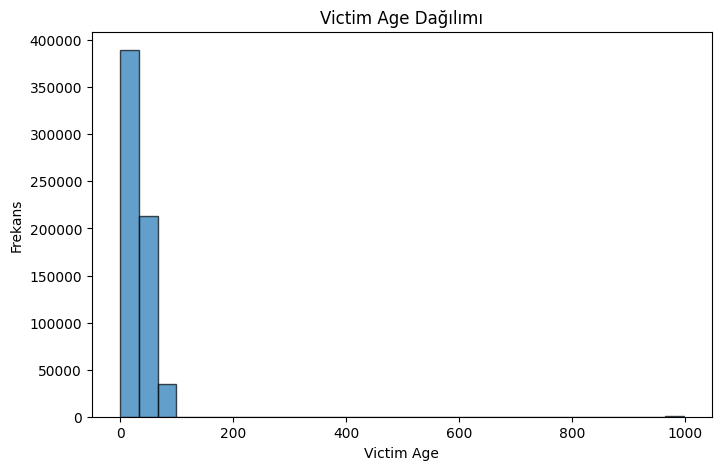

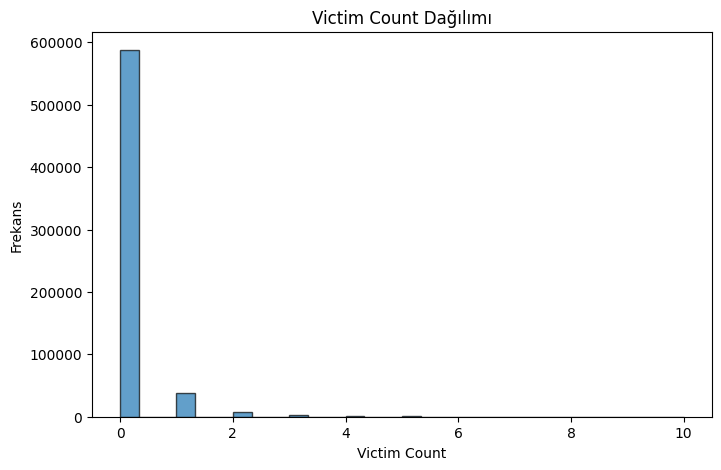

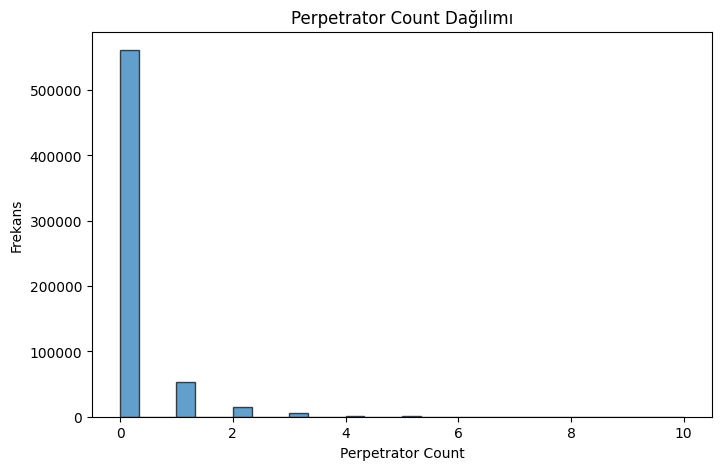

In [412]:
# Sayısal değişkenleri seç
numerical_features = ['Victim Age', 'Victim Count', 'Perpetrator Count']

# Her bir değişken için histogram
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    plt.hist(df[feature], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'{feature} Dağılımı')
    plt.xlabel(feature)
    plt.ylabel('Frekans')
    plt.show()

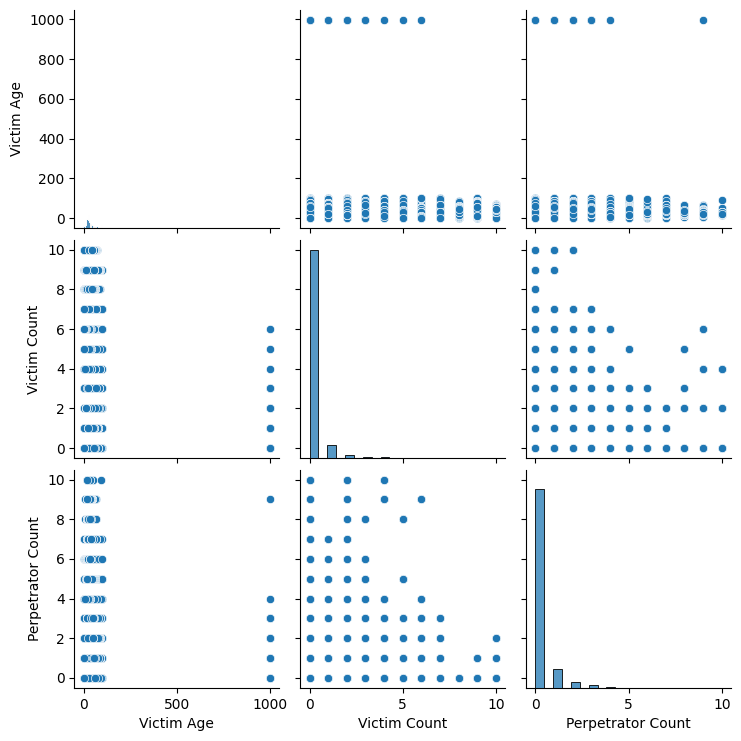

In [413]:
# sayısal değişkenlerin birbirleriyle ilişkisini görmek için 
sns.pairplot(df[numerical_features])
plt.show()

**Victim Age** 1000 gibi uçdeğerlere sahiptir. Diğer değişkenlerle belirli bir ilişkisi görülmemektedir. 

**Victim Count** ve **Perpetrator Count** (Suçlu Sayısı) ile **hafif bir pozitif ilişki** görülmektedir; mağdur sayısı arttıkça suçlu sayısı da artabilmektedir.

Genel dağılımda tek bir suçlu ve tek bir suçlu içeren olaylar yoğundur.

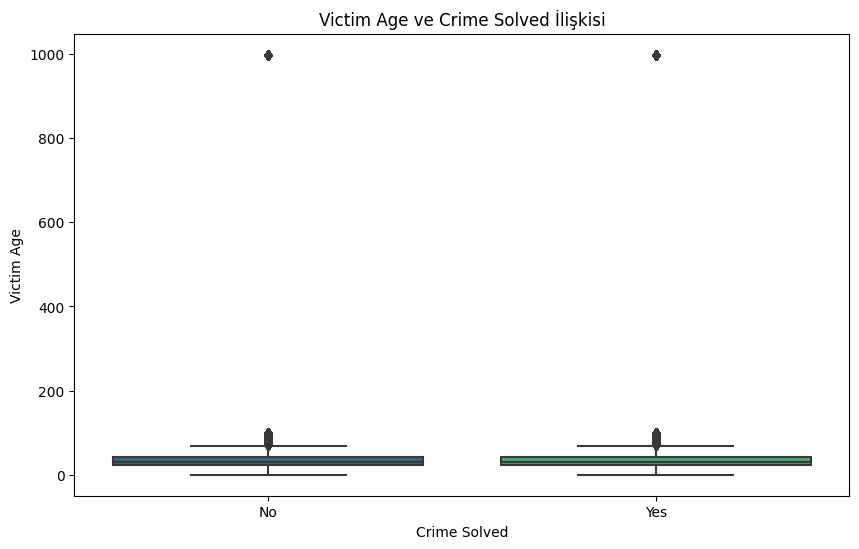

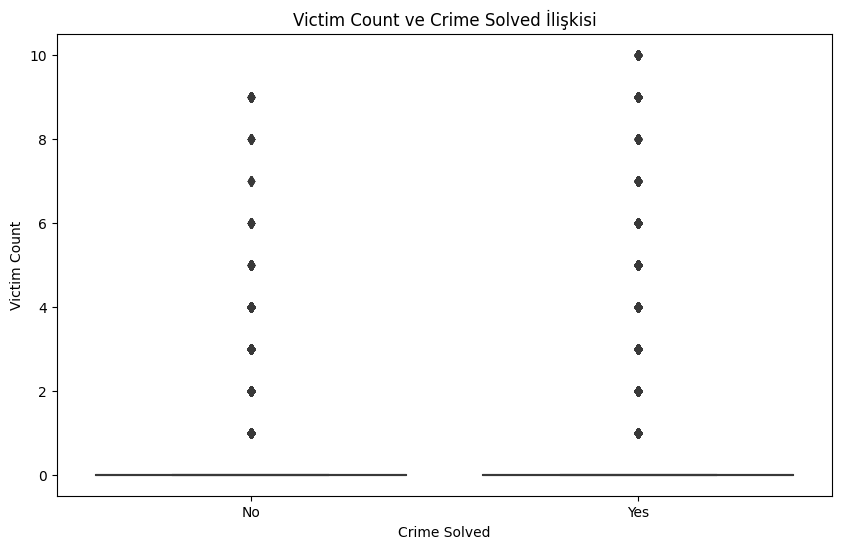

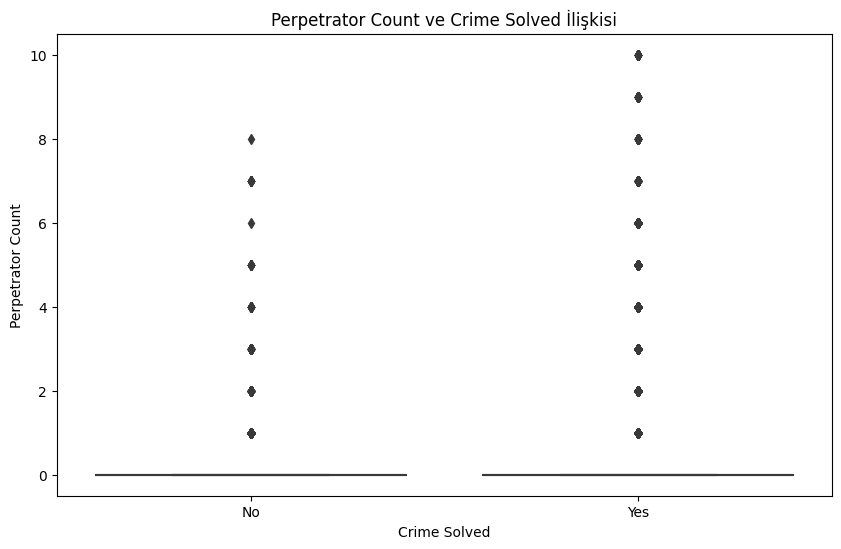

In [414]:
# Kategorik ve Sayısal Değişkenlerin İlişkisi
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Crime Solved', y=feature, palette='viridis')
    plt.title(f'{feature} ve Crime Solved İlişkisi')
    plt.show()

**Victim Age ve Crime Solved İlişkisi:** Çözülmüş ve çözülmemiş suçlar arasında kurban yaşı açısından önemli bir fark gözlenmiyor.Ancak uç değer olarak 1000 yaşında bir kurban verisi mevcut.

**Victim Count ve Crime Solved İlişkisi:** Çoğu suç yalnızca bir kurban içeriyor, bu hem çözülmüş hem de çözülmemiş suçlar için benzer bir durum.Birden fazla kurban içeren suçlar nadir ve genel dağılım üzerinde belirgin bir etkisiz.

**Perpetrator Count ve Crime Solved İlişkisi:** Faillerin sayısı açısından, çoğu suç yalnızca bir fail içeriyor.Daha fazla fail içeren suçlar nadir olduğu gibi, çözülmüş ya da çözülmemiş olma durumu üzerinde belirgin bir fark gözlenmiyor.

In [415]:
# Yıl sütununu tam sayıya çevirme
df['Year'] = df['Year'].astype(int)

In [416]:
df['Crime Type'].value_counts(normalize=True)
df['Crime Solved'].value_counts(normalize=True)

Crime Solved
Yes    0.710393
No     0.289607
Name: proportion, dtype: float64

Suçların %71 oranında çözüldüğü görünüyor.Çözüm sürecinde yüksek bir başarı oranına işaret eder.Ancak çözülmemiş suçların oranı da dikkate değerdir.

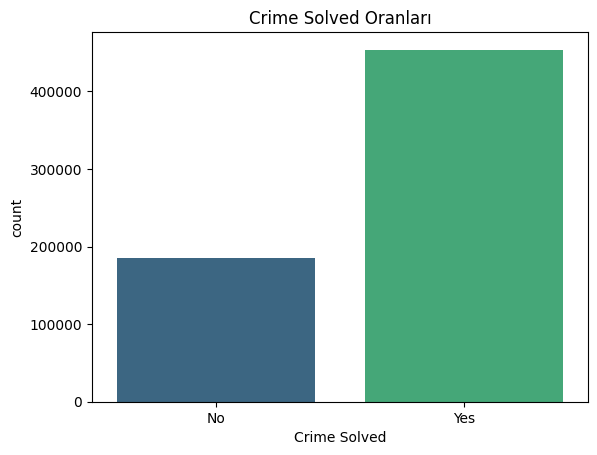

In [417]:
plt.title('Crime Solved Oranları')
sns.countplot(data=df, x='Crime Solved', palette='viridis')
plt.show()

Yukarıda gördüğümüz grafikte *yeşil bar*, çözülen suçların sayısını temsil ederken, *mavi bar* çözülemeyen suçların sayısını temsil etmektedir. Grafikten, çözülen suçların sayısının çözülemeyenlere göre oldukça fazla olduğu açıkça görülmektedir. Bu, çoğu suçun çözüldüğü ve bunun veri setindeki suçların büyük bir kısmını oluşturduğu anlamına gelir.

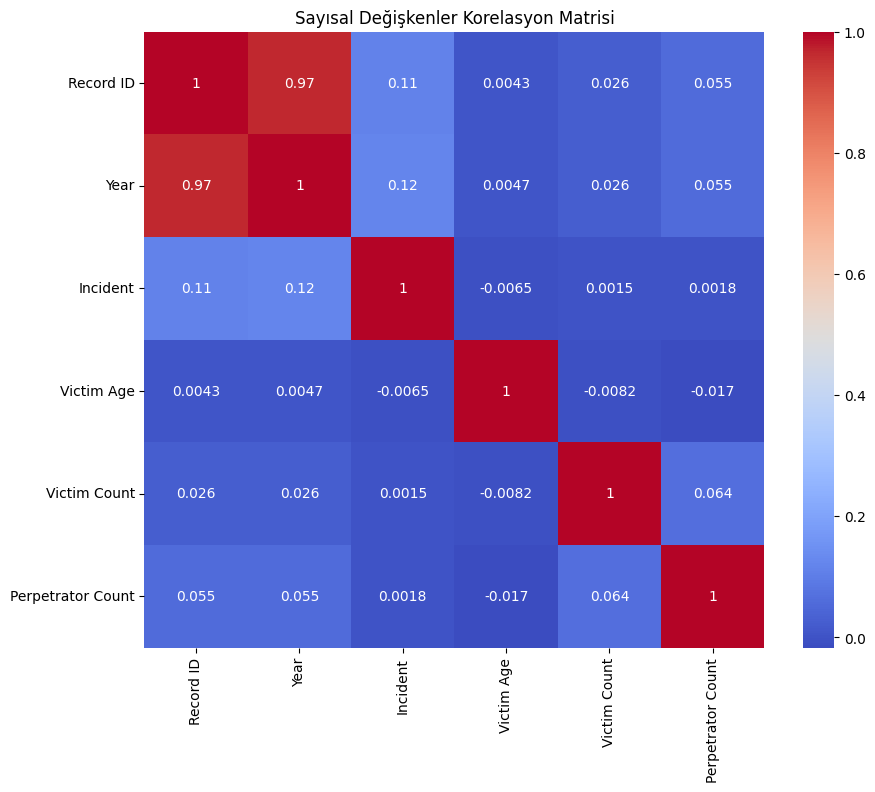

In [418]:
# Sadece sayısal sütunları seç
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Korelasyon matrisi ve heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Sayısal Değişkenler Korelasyon Matrisi')
plt.show()

Yukarıdaki korelasyon matrisi, veri setindeki sayısal değişkenler arasındaki ilişkileri görselleştirir. Korelasyon katsayısı -1 ile 1 arasında bir değere sahiptir:
- **1 yakın değerler:** Güçlü pozitif ilişkir. İki değişken birlikte artar.
- **0 :** Hiçbir ilişki yoktur.
- **-1 yakın değerler:** Güçlü negatif ilişki.Bir değişken artarken diğeri azalır).

**Record ID** ve **Year**, 0.97 gibi yüksek pozitif korelasyon değeri ile birbiriyle güçlü pozitif ilişkilidir. Bu, bu iki değişkenin birlikte artma veya azalma eğiliminde olduğunu gösterir.

**Victim Count** ve **Perpetrator Count**, 0.064 ile hafif pozitif bir ilişki sergiliyor, bu da bu değişkenlerin birbiriyle hafifçe ilişkili olduğunu gösterir.Bu, kurban ve saldırgan sayılarının birbirine çok az bağlı olduğunu gösterir.

Özetle: Genel olarak değişkenler arasında güçlü bir korelasyon yok, bu da bağımsız değişkenlerin birbirini çok fazla etkileyen bir yapıda olmadığını gösterir.

In [419]:
# 0.8'in üzerinde korelasyona sahip sütunları bulun
high_corr_features = correlation_matrix.columns[(correlation_matrix > 0.8).any()]
print(high_corr_features)

Index(['Record ID', 'Year', 'Incident', 'Victim Age', 'Victim Count',
       'Perpetrator Count'],
      dtype='object')


**Yıllara göre çözülen ve çözülemeyen suçların oransal dağılımın bar grafiği:**

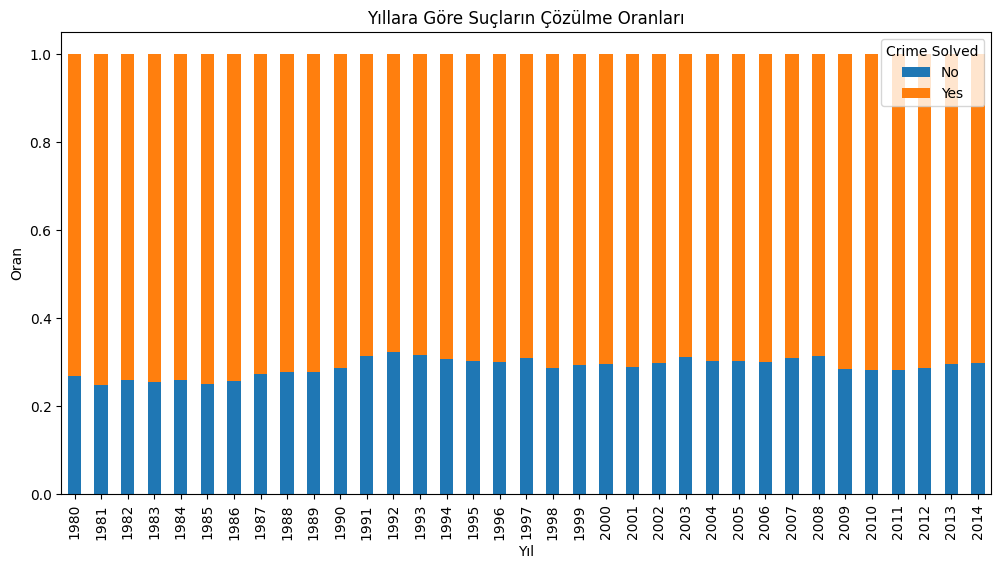

In [420]:
df.groupby('Year')['Crime Solved'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Yıllara Göre Suçların Çözülme Oranları')
plt.xlabel('Yıl')
plt.ylabel('Oran')
plt.show()

Bar gafikte turuncu barlar, çözülen suçların oranını, mavi barlar ise çözülemeyen suçların oranını temsil ediyor. Genel bir bakışta, turuncu barların çoğunlukta olduğu görülüyor, bu da çözülen suçların sayısının genelde çözülemeyenlerden daha fazla olduğunu gösteriyor.Fakat yıllar ilerledikçe mavi barların boyutlarında belirgin bir değişiklik olup olmadığını görmek şu an için zor çünkü grafik yıllara göre oransal değerleri aynı ölçekte sunuyor.

In [421]:
solved_by_year = df.groupby(['Year', 'Crime Solved'], observed=True).size().unstack()
solved_by_year['Solve Rate (%)'] = (solved_by_year['Yes'] / solved_by_year.sum(axis=1)) * 100

solved_by_year

Crime Solved,No,Yes,Solve Rate (%)
Year,,,
1980,6010,16435,73.223435
1981,5106,15458,75.170200
1982,5158,14772,74.119418
1983,4847,14199,74.551087
1984,4571,12972,73.944023
1985,4466,13385,74.981794
1986,5000,14491,74.347135
1987,4989,13219,72.599956
1988,5072,13195,72.234083


### **Çözüme ulaşan suçların yüzdesini yıllara göre çizgi grafiği:**

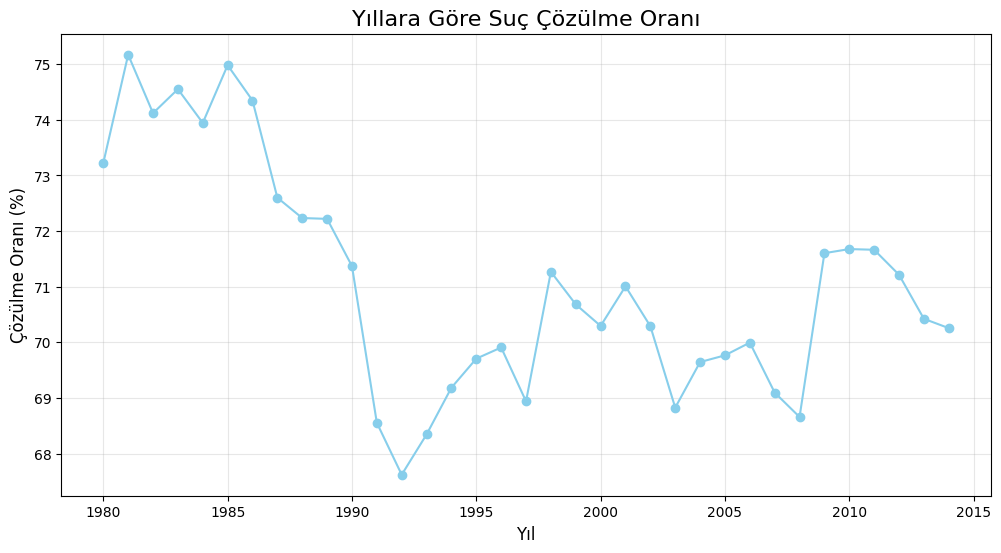

In [422]:
# Çizgi grafiği

plt.figure(figsize=(12, 6))
plt.plot(solved_by_year.index, solved_by_year['Solve Rate (%)'], marker='o', color='skyblue')
plt.title('Yıllara Göre Suç Çözülme Oranı', fontsize=16)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Çözülme Oranı (%)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Yukarıdaki grafik yıllara göre suçların çözülme oranını **yüzdelik** olarak gösteriyor.Grafik, 1980'lerden başlayarak 2014'e kadar olan dönemi kapsıyor ve çözülme oranının zaman içinde dalgalanmalara sahip. Grafikte, 1980'lerin başında çözülme oranları %75 civarında iken, bu oran 1990'ların başına doğru %70'in altına düşüyor. 1990'ların ortalarında oranlar %68 gibi en düşük seviyeye ulaşıyor. 2000'lerin başından itibaren çözülme oranları yavaş yavaş artmaya başlıyor ve 2010'lara gelindiğinde tekrar %75 civarına ulaşıyor.

In [423]:
crime_solved_by_type = df.groupby(['Crime Type', 'Crime Solved'], observed=False).size().unstack()
crime_solved_by_type['Solve Rate (%)'] = (crime_solved_by_type['Yes'] / crime_solved_by_type.sum(axis=1)) * 100
print(crime_solved_by_type)

Crime Solved                    No     Yes  Solve Rate (%)
Crime Type                                                
Manslaughter by Negligence     370    8478       95.818264
Murder or Manslaughter      184531  445075       70.691035


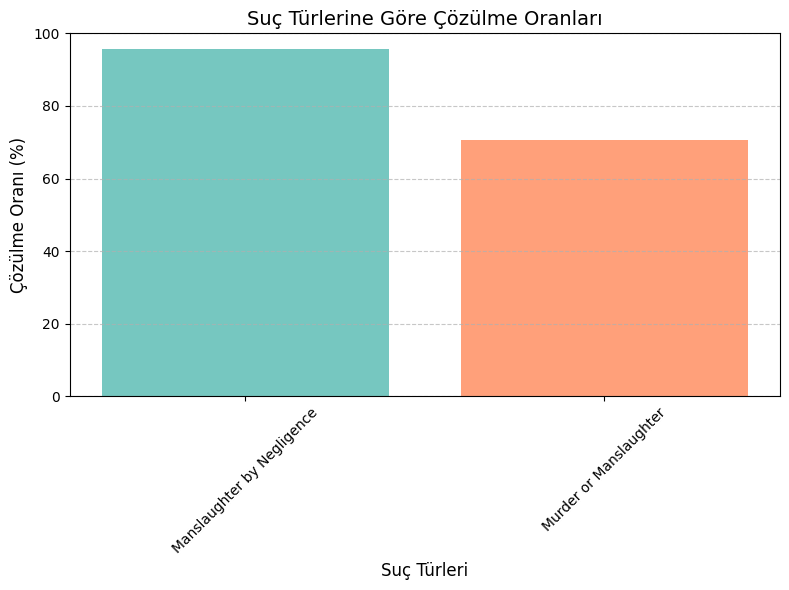

In [424]:
# Çubuk grafik oluşturma
plt.figure(figsize=(8, 6))
plt.bar(crime_solved_by_type.index, crime_solved_by_type['Solve Rate (%)'], color=['#76c7c0', '#ffa07a'])
plt.title("Suç Türlerine Göre Çözülme Oranları", fontsize=14)
plt.ylabel("Çözülme Oranı (%)", fontsize=12)
plt.xlabel("Suç Türleri", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

* Manslaughter by Negligence suçları %95,8 çözülme oranına sahiptir, bu oldukça yüksektir.
* Murder or Manslaughter suçlarının çözülme oranı %70,6 ile daha düşüktür.

Suç türlerinin çözülme zorluğunda önemli farklılıklar olduğunu görüyoruz.

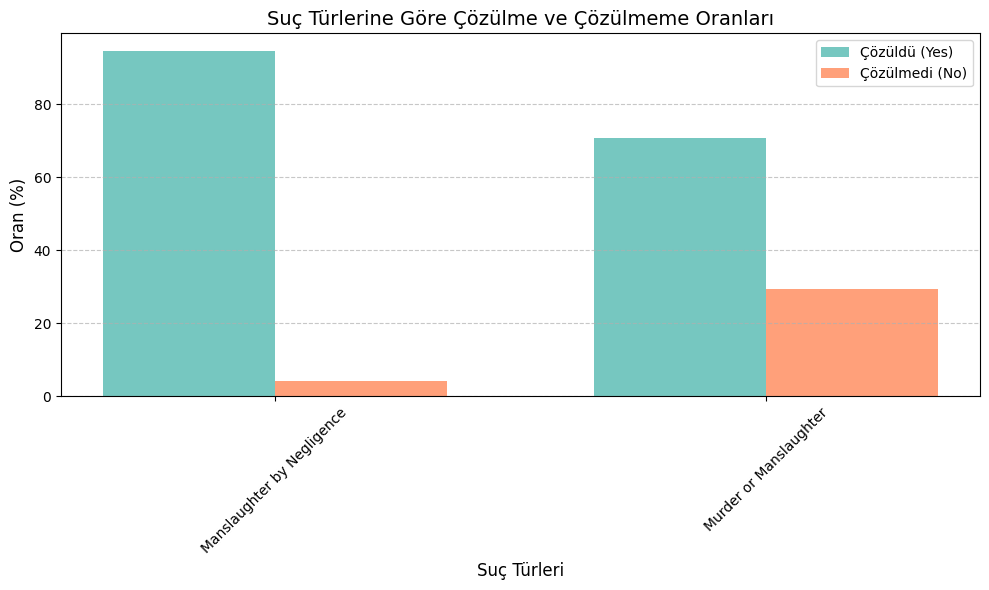

In [425]:
# Veriyi hazırlama
crime_solved_by_type['No Rate (%)'] = crime_solved_by_type['No'] / crime_solved_by_type.sum(axis=1) * 100
crime_solved_by_type['Yes Rate (%)'] = crime_solved_by_type['Yes'] / crime_solved_by_type.sum(axis=1) * 100

x = np.arange(len(crime_solved_by_type.index))  # X ekseni
width = 0.35  # Çubuk genişliği

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, crime_solved_by_type['Yes Rate (%)'], width, label='Çözüldü (Yes)', color='#76c7c0')
plt.bar(x + width/2, crime_solved_by_type['No Rate (%)'], width, label='Çözülmedi (No)', color='#ffa07a')


# Grafik detayları
plt.xlabel("Suç Türleri", fontsize=12)
plt.ylabel("Oran (%)", fontsize=12)
plt.title("Suç Türlerine Göre Çözülme ve Çözülmeme Oranları", fontsize=14)
plt.xticks(x, crime_solved_by_type.index, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### Suç Türlerine Göre Çözülme ve Çözülmeme Oranları

Yukarıdaki grafik, suç türlerine göre çözülme ve çözülmeme oranlarını göstermektedir:

**Manslaughter by Negligence (İhmalkarlıkla Adam Öldürme):** 
Çözülme oranı oldukça yüksek olup, %95'in üzerindedir. Bu tür suçlar, diğer suç türlerine kıyasla daha kolay çözülebilmektedir. Çözülmeme oranı çok düşüktür ve neredeyse ihmal edilebilir düzeydedir.


**Murder or Manslaughter (Cinayet veya Adam Öldürme):**
Çözülme oranı %70 civarındadır. Bu oran, suçların çoğunluğunun çözülebildiğini göstermektedir.
Ancak, çözülmeme oranı yaklaşık %30 olup, bu suç türünün daha karmaşık bir yapıya sahip olabileceğine ve çözülmesinin daha zor olduğuna işaret etmektedir.

Bu analiz, suç türlerine bağlı olarak çözülme oranlarının farklılık gösterdiğini ve bazı suçların daha yüksek çözülme oranlarına sahip olduğunu net bir şekilde ortaya koymaktadır.

 **Eyaletlere Göre Çözülme Başarı Oranları Analizi:**

In [426]:
# Eyaletlere göre çözülme oranı hesaplama
state_solved = df.groupby(['State', 'Crime Solved'], observed=True).size().unstack()
state_solved['Solve Rate (%)'] = (state_solved['Yes'] / state_solved.sum(axis=1)) * 100
state_solved

Crime Solved,No,Yes,Solve Rate (%)
State,,,
Alabama,2278,8764,79.369679
Alaska,279,1288,82.195278
Arizona,3456,9029,72.318783
Arkansas,1054,5688,84.366657
California,39757,75938,65.636371
Colorado,1258,5130,80.306825
Connecticut,1538,3194,67.497887
Delaware,222,932,80.762565
District of Columbia,4416,2480,35.962877


In [427]:
# Çözülme oranını sıralayıp inceleme
state_solved_sorted = state_solved.sort_values(by='Solve Rate (%)', ascending=False)
state_solved_sorted.head(10)  # En yüksek çözülme oranına sahip 10 eyalet

Crime Solved,No,Yes,Solve Rate (%)
State,,,
North Dakota,20,281,93.355482
Montana,40,545,93.162393
South Dakota,33,393,92.253521
South Carolina,1017,10340,91.045170
Idaho,106,1006,90.467626
Maine,81,761,90.380048
Wyoming,59,551,90.327869
West Virginia,306,2659,89.679595
Vermont,47,352,88.220551


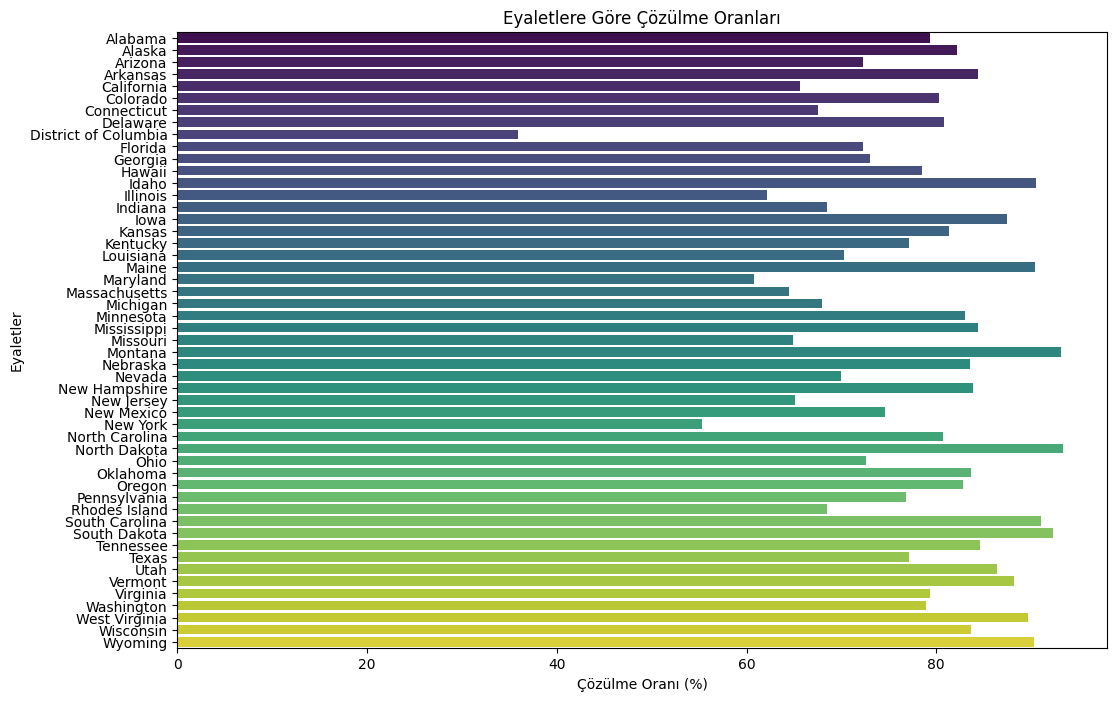

In [428]:
# FutureWarning: Pandas'ta "observed" parametresinin varsayılan değeri değişecek.
# Çalışmamız bu varsayılan değişiklikten etkilenmeyeceği için uyarıları bastırıyoruz.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Çözülme oranlarını görselleştirme
plt.figure(figsize=(12, 8))
sns.barplot(y=state_solved_sorted.index, x=state_solved_sorted['Solve Rate (%)'], palette='viridis')
plt.title('Eyaletlere Göre Çözülme Oranları')
plt.xlabel('Çözülme Oranı (%)')
plt.ylabel('Eyaletler')
plt.show()

Elde edilen sonuçlara göre, eyaletler arasında çözülme oranlarında belirgin bir farklılık gözlenmektedir. Bazı eyaletler oldukça yüksek çözülme oranlarına sahipken, bazı eyaletlerin oranları nispeten daha düşüktür. Örneğin, Wyoming ve Wisconsin gibi eyaletler, yüksek çözülme oranlarıyla dikkat çekerken, District of Columbia gibi eyaletlerde çözülme oranlarının diğer eyaletlere kıyasla düşük olduğu görülmektedir.Genel olarak çözülme oranlarının çoğu %60 ile %80 arasında yoğunlaşmıştır, bu da ülkedeki suçların büyük bir kısmının çözüme kavuştuğunu göstermektedir.

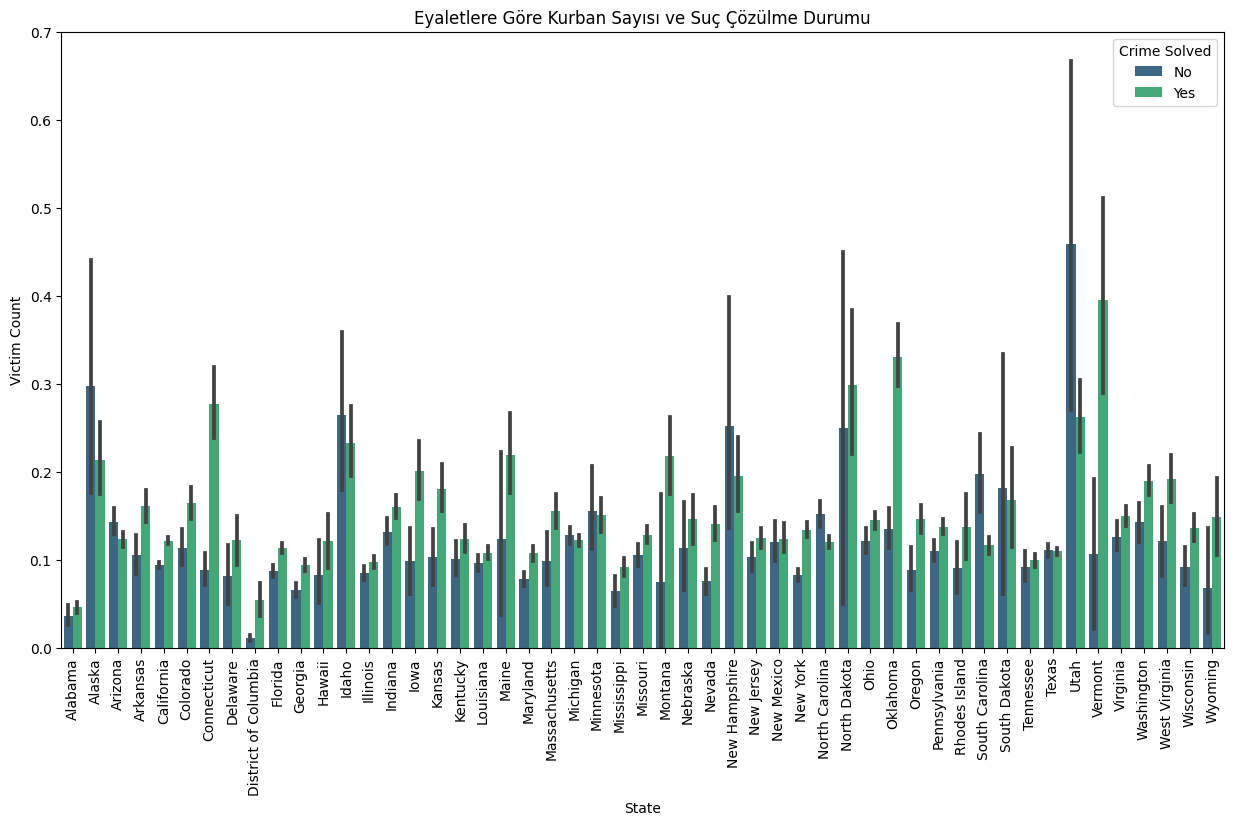

In [429]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="State", y="Victim Count", hue="Crime Solved", palette="viridis")
plt.xticks(rotation=90)
plt.title("Eyaletlere Göre Kurban Sayısı ve Suç Çözülme Durumu")
plt.xlabel("State")
plt.ylabel("Victim Count")
plt.show()

Yukarıdaki çubuk grafik, her bir eyaletteki kurban sayısını ve bu suçların çözülme durumunu (çözüldü veya çözülmedi) göstermektedir. Grafikten aşağıdaki çıkarımlar yapılabilir:
- Genel olarak çoğu eyalette çözülen suçların sayısı, çözülmeyenlere kıyasla daha yüksektir.
- Bazı eyaletlerde (örneğin, Texas ve California), kurban sayısı diğer eyaletlere kıyasla oldukça yüksektir.Suç oranlarının bu eyaletlerde daha yoğun olduğunu gösterebilir.
-  Eyaletler arasında belirgin bir dağılım farkı gözlenmektedir; bazı eyaletler hem kurban sayısı hem de çözülme oranlarında ortalamanın oldukça altındadır (küçük nüfuslu eyaletler).

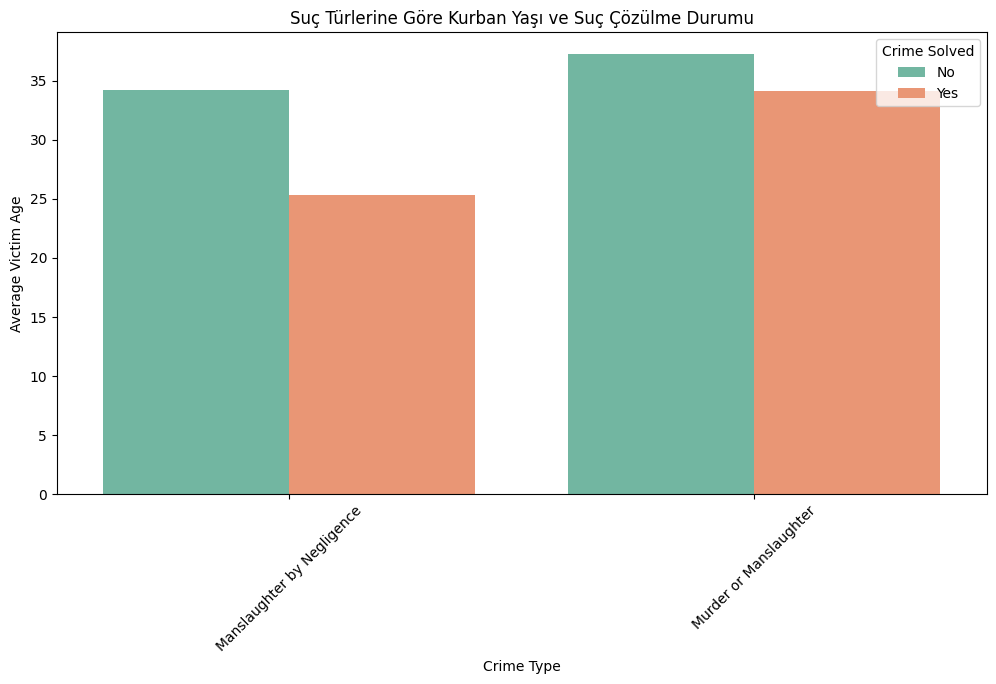

In [430]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Crime Type", y="Victim Age", hue="Crime Solved", ci=None, palette="Set2")
plt.xticks(rotation=45)
plt.title("Suç Türlerine Göre Kurban Yaşı ve Suç Çözülme Durumu")
plt.xlabel("Crime Type")
plt.ylabel("Average Victim Age")
plt.show()

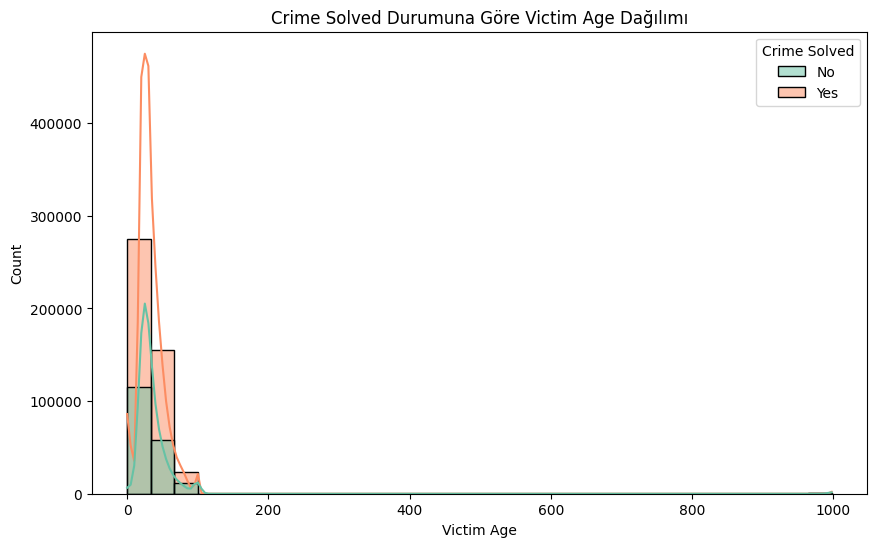

In [431]:
# Histogram ve KDE grafiği
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df, 
    x="Victim Age", 
    hue="Crime Solved",  # Kategorik değişken (çözülme durumu)
    kde=True,  # Yoğunluk eğrisi
    palette="Set2", 
    bins=30  # Histogramdaki sütun sayısı
)
plt.title("Crime Solved Durumuna Göre Victim Age Dağılımı")
plt.xlabel("Victim Age")
plt.ylabel("Count")
plt.show()

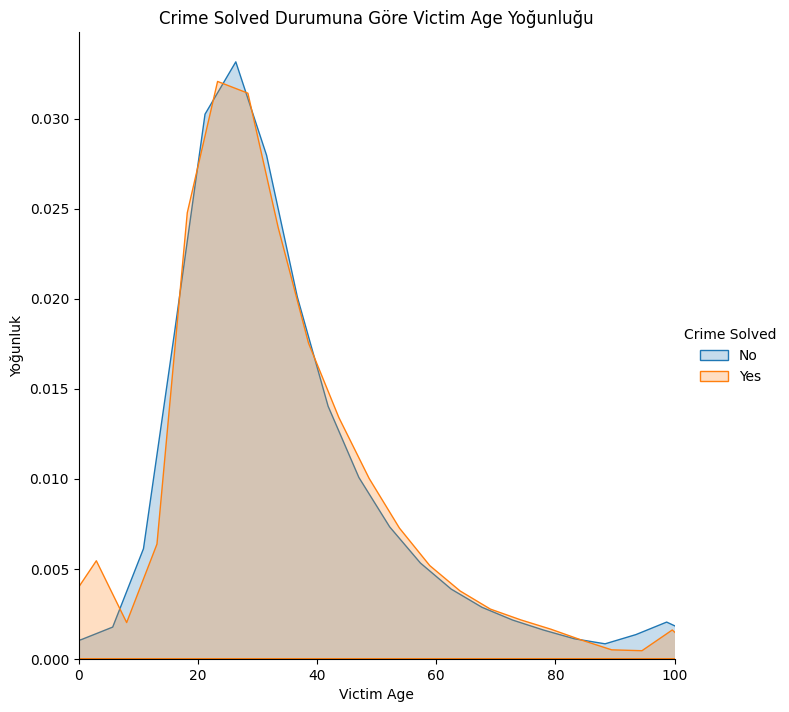

In [432]:
# FacetGrid ile kategorik kırılımda yoğunluk analizi
sns.FacetGrid(
    data=df, 
    hue="Crime Solved",  
    height=7,            
    xlim=(0, 100)        # X ekseninde gözlemlenecek sayısal değişken aralığı
).map(
    sns.kdeplot, 
    "Victim Age",        # Sayısal değişken
    fill=True            # Dolgulu yoğunluk eğrisi
).add_legend()

# Grafik başlık ve eksen isimleri
plt.title("Crime Solved Durumuna Göre Victim Age Yoğunluğu")
plt.xlabel("Victim Age")
plt.ylabel("Yoğunluk")
plt.show()

### **Aykırı Değer Analizi**

In [433]:
df = df_.copy()

<Axes: ylabel='Victim Age'>

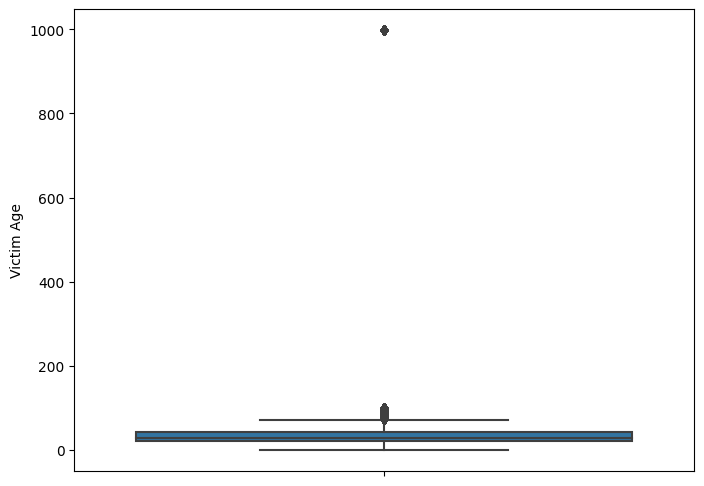

In [434]:
# Boxplot ile aykırı değer görselleştirme
plt.figure(figsize=(8, 6))  # Grafik boyutları
sns.boxplot(
    data=df,
    y=df["Victim Age"],  # Analiz etmek istediğiniz sayısal değişken
    orient="v"           # Boxplot'un dikey çizilmesi
)

In [435]:
df_victim_age = df['Victim Age']
df_victim_age

0         14
1         43
2         30
3         43
4         30
          ..
638449    30
638450    62
638451     0
638452    55
638453     0
Name: Victim Age, Length: 638454, dtype: int64

In [436]:
# Quantile değerlerin belirlenmesi.
Q1 = df_victim_age.quantile(0.25)
Q3 = df_victim_age.quantile(0.75)

print(Q1)
print(Q3)

# IQR değerin belirlenmesi.
IQR = Q3-Q1
print(IQR)

# Alt ve üst sınırların belirlenmesi.
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

22.0
42.0
20.0


In [437]:
# Upper_fence üzerinde kalan aykırı gözlemlerin index değerlerini, daha sonra kullanmak üzere bir değişkende tutmak için
outlier_idx = df_victim_age[df_victim_age > upper_fence].index

outlier_idx

Index([     7,     90,    136,    152,    154,    245,    256,    283,    345,
          346,
       ...
       638244, 638245, 638383, 638386, 638391, 638401, 638417, 638419, 638421,
       638446],
      dtype='int64', length=26729)

In [438]:
df_victim_age[df_victim_age > upper_fence]

7          99
90         90
136        74
152        76
154        79
         ... 
638401    998
638417    998
638419    998
638421     77
638446     76
Name: Victim Age, Length: 26729, dtype: int64

##### **Aykırı Gözlemlerin Silinmesi**

In [439]:
df_del = df[~(df_victim_age > upper_fence)]

df_del

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


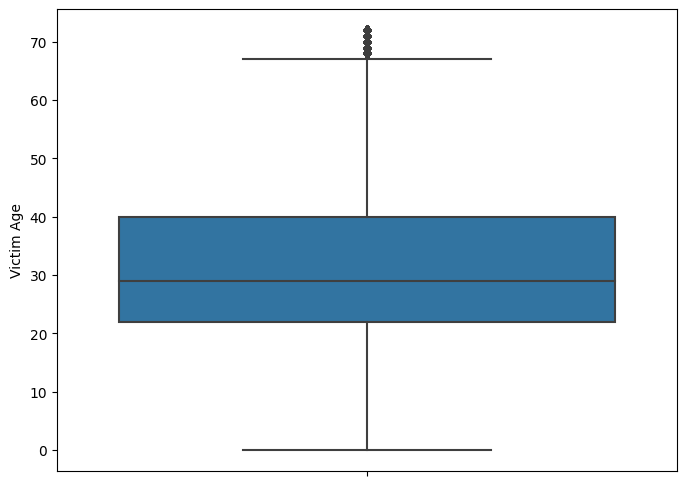

In [440]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df_del["Victim Age"],
            orient = "v");

In [441]:
for col in ['Victim Count', 'Perpetrator Count']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    print(f"{col} - Lower Fence: {lower_fence}, Upper Fence: {upper_fence}")
    print(f"Aykırı Değer Sayısı: {df[(df[col] < lower_fence) | (df[col] > upper_fence)].shape[0]}")

Victim Count - Lower Fence: 0.0, Upper Fence: 0.0
Aykırı Değer Sayısı: 52395
Perpetrator Count - Lower Fence: 0.0, Upper Fence: 0.0
Aykırı Değer Sayısı: 79616


In [442]:
df['Perpetrator Count'].value_counts()

Perpetrator Count
0     558838
1      54745
2      15777
3       6531
4       1489
5        592
6        207
7        129
8         52
9         52
10        42
Name: count, dtype: int64

<Axes: ylabel='Perpetrator Count'>

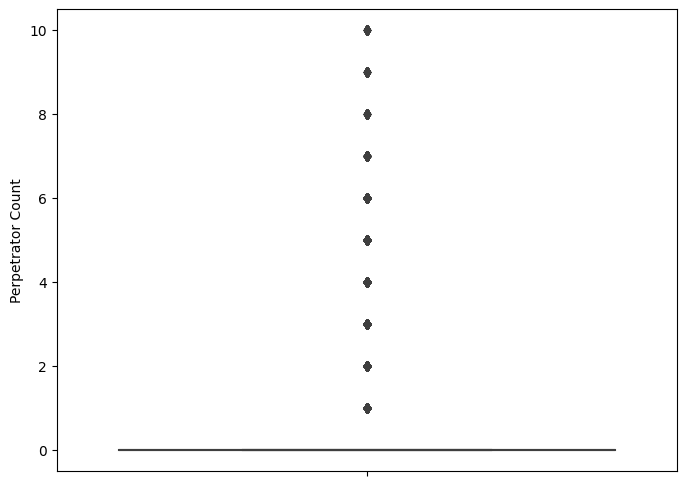

In [443]:
plt.figure(figsize=(8, 6))  # Grafik boyutları
sns.boxplot(
    data=df,
    y=df["Perpetrator Count"],  # Analiz etmek istediğiniz sayısal değişken
    orient="v"           # Boxplot'un dikey çizilmesi
)


In [444]:
df_perpetrator_count = df['Perpetrator Count']
df_perpetrator_count

0         0
1         0
2         0
3         0
4         1
         ..
638449    0
638450    0
638451    0
638452    1
638453    1
Name: Perpetrator Count, Length: 638454, dtype: int64

Verilerin frekansına baktığınızda, sütundaki değerlerin çoğunluğu 0.0 olarak gözüküyor. Çok az sayıda gözlem 1.0 değerine sahip.Bu durum, bu sütunun büyük bir kısmının tek bir değerden oluştuğunu ve veri varyasyonunun çok düşük olduğunu gösteriyor.

### **Feature Engineering**

In [445]:
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [446]:
# Victim Age'e göre yaş segmentasyonu
def age_range(age):
    if age < 20:
        return 'Young'
    elif 20 <= age <= 50:
        return 'Adult'
    else:
        return 'Senior'

# Yeni bir sütun oluşturup yaş segmentasyonunu ekliyoruz
df['age_range'] = df['Victim Age'].apply(age_range)

df[['Victim Age', 'age_range']].head(10)

,Victim Age,age_range
0,14,Young
1,43,Adult
2,30,Adult
3,43,Adult
4,30,Adult
5,30,Adult
6,42,Adult
7,99,Senior
8,32,Adult
9,38,Adult


<Axes: xlabel='age_range', ylabel='count'>

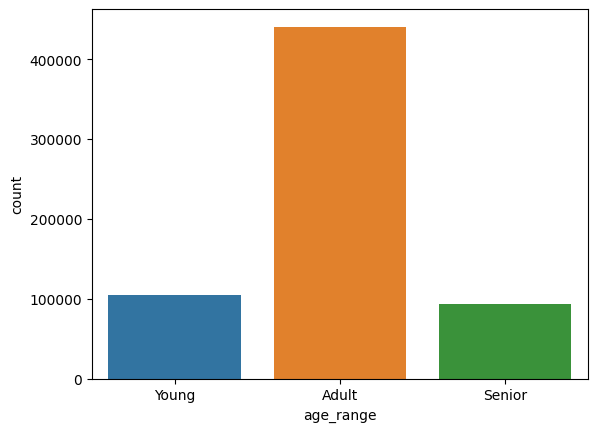

In [457]:
sns.countplot(x='age_range', data=df)

In [452]:
def victim_count_range(count):
    if count < 2:
        return 'Low'
    elif 2 <= count <= 5:
        return 'Medium'
    else:
        return 'High'

df['victim_count_range'] = df['Victim Count'].apply(victim_count_range)

df[['victim_count_range','Victim Count']].head(4)

,victim_count_range,Victim Count
0,Low,0
1,Low,0
2,Low,0
3,Low,0
